In [1]:
!pip install tensorflow

In [2]:
# Download TA-Lib
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

# Extract the files
!tar -xzf ta-lib-0.4.0-src.tar.gz

# Navigate to the directory
%cd ta-lib/

# Configure and install
!./configure --prefix=/usr
!make
!make install

# Go back to the parent directory
%cd ..

# Install the Python wrapper for TA-Lib
!pip install ta-lib

--2024-07-10 14:08:03--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-07-10 14:08:04--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netix.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-07-10 14:08:04--  http://netix.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Resolving net

In [3]:
!pip install alpha_vantage

1 Physical GPUs, 1 Logical GPUs
Is TensorFlow using GPU: True
Is GPU available: True
Loading data from spy_data_with_indicators_extended.csv
Class distribution: Counter({3: 1820, 2: 1341, 1: 1103, 4: 1026, 0: 915})
Selected features: ['volume', 'returns', 'log_return', 'return_3', 'return_5', 'return_10', 'return_20', 'atr', 'aroon_up', 'aroon_down', 'rsi', 'slowk', 'slowd', 'sma_diff', 'rsi_overbought', 'rsi_oversold', 'bb_position', 'macd', 'macd_signal', 'macd_hist']

Running baseline model (Stratified)
Baseline Accuracy: 0.1699

Baseline Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.22      0.12       102
           1       0.21      0.17      0.19       226
           2       0.17      0.09      0.12       268
           3       0.35      0.18      0.24       327
           4       0.12      0.29      0.17       101

    accuracy                           0.17      1024
   macro avg       0.18      0.19      0.17      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 1s 43ms/step - loss: 1.6164 - accuracy: 0.2049 - val_loss: 1.5777 - val_accuracy: 0.3171 - lr: 1.0000e-04
Epoch 3/100
13/13 [==============================] - 1s 41ms/step - loss: 1.6074 - accuracy: 0.1976 - val_loss: 1.5637 - val_accuracy: 0.3512 - lr: 1.0000e-04
Epoch 4/100
13/13 [==============================] - 1s 40ms/step - loss: 1.6140 - accuracy: 0.2012 - val_loss: 1.5623 - val_accuracy: 0.3512 - lr: 1.0000e-04
Epoch 5/100
13/13 [==============================] - 0s 37ms/step - loss: 1.6074 - accuracy: 0.1902 - val_loss: 1.5623 - val_accuracy: 0.3512 - lr: 1.0000e-04
Epoch 6/100
13/13 [==============================] - 0s 38ms/step - loss: 1.6069 - accuracy: 0.2024 - val_loss: 1.5666 - val_accuracy: 0.3512 - lr: 1.0000e-04
Epoch 7/100
13/13 [==============================] - 0s 38ms/step - loss: 1.5968 - accuracy: 0.2195 - val_loss: 1.5662 - val_accuracy: 0.3512 - lr: 2.0000e-05
Epoch 8/100
13/13 [==============================] - 0s 37

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


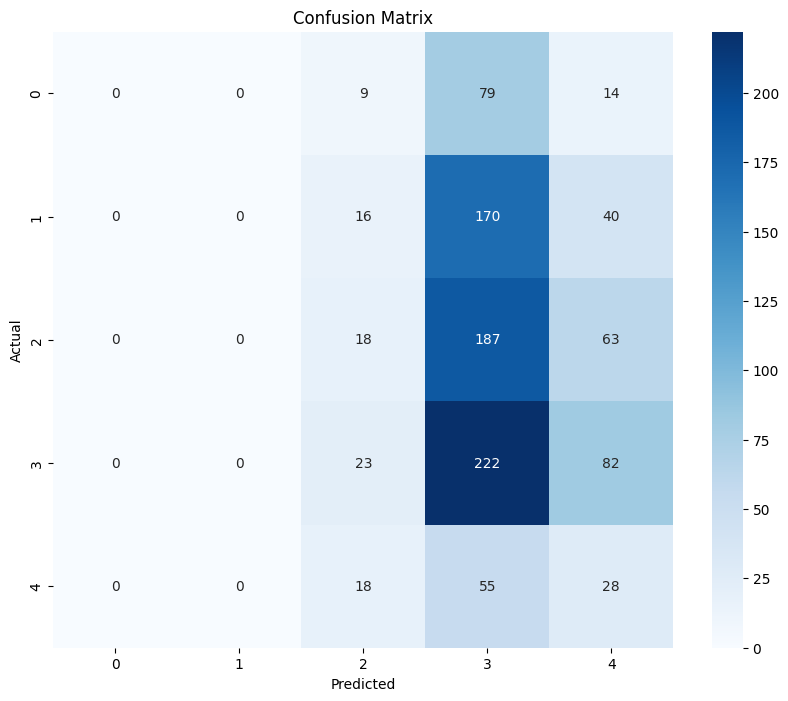

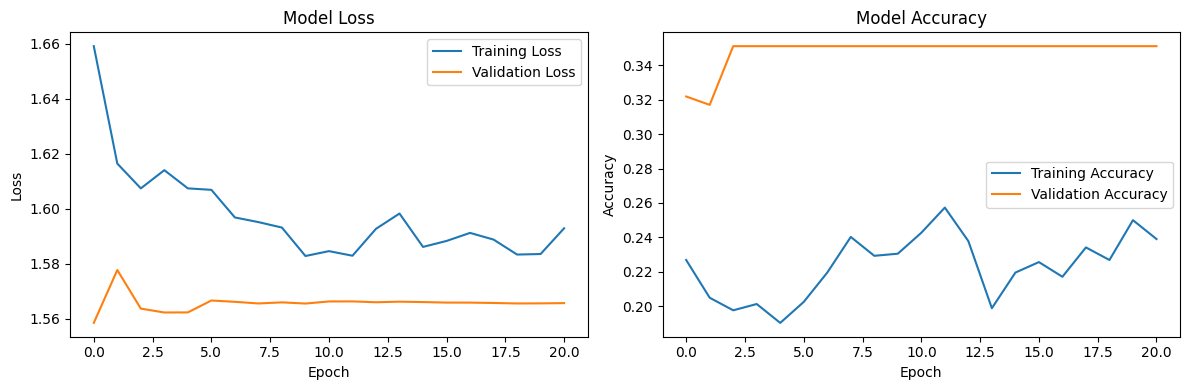

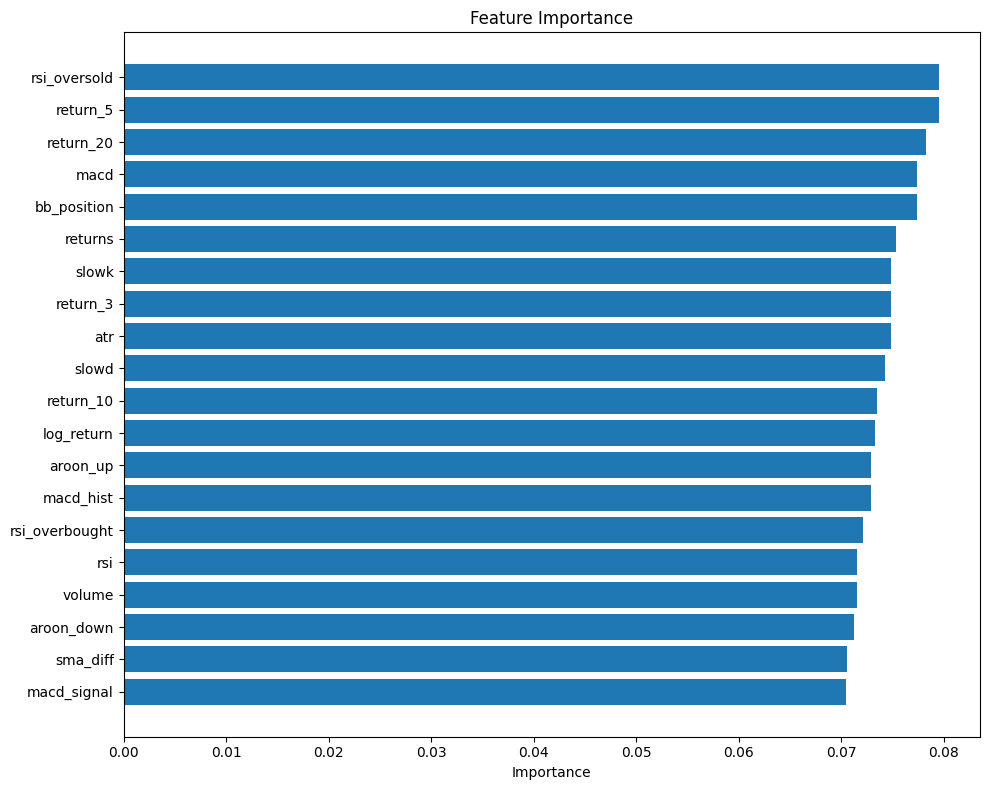

Analysis complete.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.dummy import DummyClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D, Concatenate, TimeDistributed

from tensorflow.keras.models import Model
import talib
import logging
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from collections import Counter
import os

# Alpha Vantage API key
API_KEY = '70R97N884LL7QPFU'
DATA_FILE = 'spy_data_with_indicators_extended.csv'

# GPU Configuration
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

print("Is TensorFlow using GPU:", tf.test.is_built_with_cuda())
print("Is GPU available:", tf.test.is_gpu_available())

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def get_or_fetch_data():
    if os.path.exists(DATA_FILE):
        print(f"Loading data from {DATA_FILE}")
        return pd.read_csv(DATA_FILE, index_col='date', parse_dates=True)

    print("Fetching new data from Alpha Vantage")
    data = get_daily_data()
    indicators = get_technical_indicators()

    # Merge data and indicators
    combined_data = pd.concat([data, indicators], axis=1)
    combined_data = combined_data.sort_index()

    # Save to CSV
    combined_data.to_csv(DATA_FILE)
    print(f"Data saved to {DATA_FILE}")

    return combined_data

def get_daily_data(symbol='SPY'):
    ts = TimeSeries(key=API_KEY, output_format='pandas')
    data, _ = ts.get_daily(symbol=symbol, outputsize='full')
    data = data.sort_index()
    return data

def get_technical_indicators(symbol='SPY'):
    ti = TechIndicators(key=API_KEY, output_format='pandas')

    indicators = {}

    # Existing indicators
    indicators['aroon'], _ = ti.get_aroon(symbol=symbol, interval='daily', time_period=14)
    indicators['sma'], _ = ti.get_sma(symbol=symbol, interval='daily', time_period=20, series_type='close')
    indicators['rsi'], _ = ti.get_rsi(symbol=symbol, interval='daily', time_period=14, series_type='close')

    # New indicators (removed MACD)
    indicators['bbands'], _ = ti.get_bbands(symbol=symbol, interval='daily', time_period=20, series_type='close')
    indicators['stoch'], _ = ti.get_stoch(symbol=symbol, interval='daily')

    # Merge all indicators
    all_indicators = pd.concat(indicators.values(), axis=1)
    all_indicators = all_indicators.sort_index()

    return all_indicators

def create_hybrid_model(input_shape, num_classes=5, num_heads=4, ff_dim=64, num_transformer_blocks=4, mlp_units=[64, 32], dropout=0.3):
    inputs = Input(shape=input_shape)

    # LSTM layers
    x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)

    # Adjust LSTM output to match input feature dimension
    x = TimeDistributed(Dense(input_shape[-1]))(x)

    # Transformer blocks
    for _ in range(num_transformer_blocks):
        attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(x, x)
        x = LayerNormalization(epsilon=1e-6)(x + attn_output)
        ff_output = Dense(ff_dim, activation="relu")(x)
        ff_output = Dense(input_shape[-1])(ff_output)
        x = LayerNormalization(epsilon=1e-6)(x + ff_output)

    x = GlobalAveragePooling1D()(x)
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(dropout)(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    return Model(inputs=inputs, outputs=outputs)

def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)

        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))

        return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1 + epsilon)) - \
               tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0 + epsilon))
    return focal_loss_fixed

def aggregate_to_5min(data, output_filename='SPY_data_5_min.csv'):
    """Aggregate 1-minute data to 5-minute intervals, removing rows with missing OHLC data, and save to CSV."""
    logging.info("Aggregating 1-minute data to 5-minute intervals...")

    # Remove rows where any OHLC data is missing
    data = data.dropna(subset=['open', 'high', 'low', 'close'])

    # Ensure the index is datetime
    data.index = pd.to_datetime(data.index)

    agg_dict = {
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }

    data_5min = data.resample('5T').agg(agg_dict)

    # Remove any aggregated rows with NaN values
    data_5min = data_5min.dropna()

    # Save the aggregated data to a CSV file
    data_5min.to_csv(output_filename)

    logging.info(f"Original data shape: {data.shape}")
    logging.info(f"Aggregated data shape: {data_5min.shape}")
    logging.info(f"Aggregated data saved to {output_filename}")

    return data_5min

def feature_importance_3d(model, X, y, feature_names):
    n_features = X.shape[2]
    importances = np.zeros(n_features)

    # Compute baseline score
    baseline_score = model.evaluate(X, y, verbose=0)[1]  # Use accuracy as the metric

    for i in range(n_features):
        # Create a copy of the input data
        X_permuted = X.copy()

        # Permute the i-th feature across all sequences
        X_permuted[:, :, i] = np.random.permutation(X_permuted[:, :, i])

        # Compute new score
        new_score = model.evaluate(X_permuted, y, verbose=0)[1]

        # Compute importance
        importances[i] = baseline_score - new_score

    # Create DataFrame with feature importances
    importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    importance_df = importance_df.sort_values('importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance_df.head(20))
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

def create_enhanced_features(data):
    features = pd.DataFrame(index=data.index)

    # Basic price and volume features
    features['open'] = data['1. open']
    features['high'] = data['2. high']
    features['low'] = data['3. low']
    features['close'] = data['4. close']
    features['volume'] = data['5. volume']

    # Return features
    features['returns'] = features['close'].pct_change()
    features['log_return'] = np.log(features['close'] / features['close'].shift(1))
    for i in [3, 5, 10, 20]:
        features[f'return_{i}'] = features['close'].pct_change(i)

    # Volatility
    features['atr'] = talib.ATR(features['high'], features['low'], features['close'], timeperiod=14)

    # Add indicators from Alpha Vantage
    indicator_columns = ['Aroon Up', 'Aroon Down', 'SMA', 'RSI',
                         'Real Upper Band', 'Real Middle Band', 'Real Lower Band', 'SlowK', 'SlowD']
    for col in indicator_columns:
        if col in data.columns:
            features[col.lower().replace(' ', '_')] = data[col]

    # Additional features
    if 'SMA' in data.columns:
        features['sma_diff'] = features['close'] - data['SMA']
    if 'RSI' in data.columns:
        features['rsi_overbought'] = (data['RSI'] > 70).astype(int)
        features['rsi_oversold'] = (data['RSI'] < 30).astype(int)
    if all(col in data.columns for col in ['Real Upper Band', 'Real Lower Band']):
        features['bb_position'] = (features['close'] - data['Real Lower Band']) / (data['Real Upper Band'] - data['Real Lower Band'])

    # Calculate MACD using talib
    features['macd'], features['macd_signal'], features['macd_hist'] = talib.MACD(features['close'])

    # Replace infinite values with NaN and then fill NaN values
    features = features.replace([np.inf, -np.inf], np.nan)
    features = features.fillna(method='ffill').fillna(method='bfill')

    return features

def prepare_data(features, sequence_length=60, target_horizon=5, n_features=20):
    # Calculate future returns
    future_returns = features['close'].pct_change(target_horizon).shift(-target_horizon)

    # Create target variable with 5 classes
    def classify_return(ret):
        if ret <= -0.02:
            return 0  # Significant down
        elif -0.02 < ret <= -0.005:
            return 1  # Slight down
        elif -0.005 < ret < 0.005:
            return 2  # No change
        elif 0.005 <= ret < 0.02:
            return 3  # Slight up
        else:
            return 4  # Significant up

    y = future_returns.apply(classify_return)
    features = features[:-target_horizon]  # Remove last rows as they won't have a target value
    y = y[:-target_horizon]

    print("Class distribution:", Counter(y))

    # Feature selection
    selector = SelectKBest(f_classif, k=n_features)
    selected_features = selector.fit_transform(features, y)
    selected_feature_names = features.columns[selector.get_support()].tolist()
    print("Selected features:", selected_feature_names)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(selected_features)

    X_seq, y_seq = [], []
    for i in range(len(X_scaled) - sequence_length):
        X_seq.append(X_scaled[i:i+sequence_length])
        y_seq.append(y.iloc[i+sequence_length])

    return np.array(X_seq), to_categorical(np.array(y_seq)), scaler, selected_feature_names

def run_experiment(features, target_horizon):
    print(f"\nRunning experiment for {target_horizon}-day returns")
    X, y, scaler = prepare_data(features, target_horizon=target_horizon)

    tscv = TimeSeriesSplit(n_splits=5)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        train_size = int(len(X_train) * 0.8)
        X_train, X_val = X_train[:train_size], X_train[train_size:]
        y_train, y_val = y_train[:train_size], y_train[train_size:]

        model, history = train_model(X_train, y_train, X_val, y_val)

        print(f"\nEvaluation for {target_horizon}-day returns model:")
        evaluate_model(model, X_test, y_test)

        plot_training_history(history)
        plot_feature_importance(model, features.columns)

        break  # Remove this to run all folds

def create_transformer_model(input_shape, num_heads=4, ff_dim=64, num_transformer_blocks=4, mlp_units=[64, 32], dropout=0.3):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(x, x)
        attn_output = Dense(input_shape[-1])(attn_output)
        attn_output = Dropout(dropout)(attn_output)
        x = LayerNormalization(epsilon=1e-6)(x + attn_output)
        ff_output = Dense(ff_dim, activation="relu")(x)
        ff_output = Dense(input_shape[-1])(ff_output)
        ff_output = Dropout(dropout)(ff_output)
        x = LayerNormalization(epsilon=1e-6)(x + ff_output)

    x = GlobalAveragePooling1D()(x)
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(dropout)(x)
    outputs = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

def train_model(X_train, y_train, X_val, y_val, class_weights):
    model = create_hybrid_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=64,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, model_checkpoint, reduce_lr],
        class_weight=class_weights,
        verbose=1
    )

    return model, history

def feature_importance(model, X, y, feature_names):
    results = permutation_importance(model.predict, X, y, n_repeats=10, random_state=42)
    importance_df = pd.DataFrame({'feature': feature_names, 'importance': results.importances_mean})
    importance_df = importance_df.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance_df.head(20))
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_feature_importance(model, feature_names):
    # Get the weights of the first dense layer after the input
    weights = model.layers[1].get_weights()[0]

    # Calculate feature importance as the mean absolute value of weights
    importance = np.mean(np.abs(weights), axis=1)

    # Sort features by importance
    sorted_idx = np.argsort(importance)
    sorted_importance = importance[sorted_idx]
    sorted_features = np.array(feature_names)[sorted_idx]

    # Plot
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(sorted_importance)), sorted_importance)
    plt.yticks(range(len(sorted_importance)), sorted_features)
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

def run_baseline_model(X_train, y_train, X_test, y_test):
    print("\nRunning baseline model (Stratified)")
    dummy = DummyClassifier(strategy="stratified")
    dummy.fit(X_train.reshape(X_train.shape[0], -1), np.argmax(y_train, axis=1))
    y_pred = dummy.predict(X_test.reshape(X_test.shape[0], -1))

    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    print(f"Baseline Accuracy: {accuracy:.4f}")

    print("\nBaseline Classification Report:")
    print(classification_report(np.argmax(y_test, axis=1), y_pred))

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    print(f"Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test_classes, y_pred_classes))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Get or fetch data
    data = get_or_fetch_data()

    # Create features
    features = create_enhanced_features(data)

    # Prepare data
    X, y, scaler, selected_features = prepare_data(features, target_horizon=5)

    # Split data
    tscv = TimeSeriesSplit(n_splits=5)
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        train_size = int(len(X_train) * 0.8)
        X_train, X_val = X_train[:train_size], X_train[train_size:]
        y_train, y_val = y_train[:train_size], y_train[train_size:]

        # Run baseline model
        run_baseline_model(X_train, y_train, X_test, y_test)

        # Calculate class weights
        y_integers = np.argmax(y_train, axis=1)
        class_weights = dict(enumerate(len(y_integers) / (len(np.unique(y_integers)) * np.bincount(y_integers))))

        # Train model
        model, history = train_model(X_train, y_train, X_val, y_val, class_weights)

        # Evaluate model
        print("\nEvaluating hybrid model:")
        evaluate_model(model, X_test, y_test)

        # Plot results
        plot_training_history(history)
        plot_feature_importance(model, selected_features)

        break  # Remove this to run all folds

    print("Analysis complete.")